# Want to implement RANSAC - RANdom SAmple Consensus

Start with simple example - linear regression.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def model_line(x1, y1, x2, y2):
    slope = (x1 - x2)/(y1 - y2)
    height = y1 - x1*slope
    return slope, height

In [32]:
# generate the data

# inliers
# looking for y = 3x - 4
Xi = np.linspace(-10, 10, 50)
Yi = 3*Xi - 4
# add some noise
Xi += np.random.random_sample(len(Xi))
Yi += np.random.random_sample(len(Yi))

# outliers
Xo = 20*(np.random.random_sample(60) - 0.5)
Yo = 50*(np.random.random_sample(60) - 0.5)

X = np.concatenate([Xi, Xo])
Y = np.concatenate([Yi, Yo])

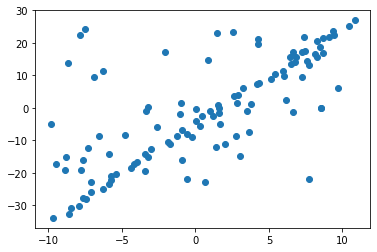

In [33]:
plt.scatter(X, Y)

RANSAC for the linear regression

In [51]:
min_consensus = 10
error_threshold = 0.5

best_error = 10000000000
best_slope = 0
best_height = 0

for i in range(100000):
    selected_pair = np.random.choice(np.arange(len(X)), 2)
    x1, x2 = X[selected_pair]
    y1, y2 = Y[selected_pair]
    guess_slope, guess_height = model_line(x1, y1, x2, y2)
    guess_Y = X*guess_slope + guess_height
    # Using AE
    consensus = np.abs(guess_Y - Y) < error_threshold
    if consensus.sum() < min_consensus:
        continue
    else:
        # MSE
        error = np.mean((guess_Y - Y)**2)
        if error < best_error:
            best_error = error
            best_slope = guess_slope
            best_height = guess_height


In [52]:
print(best_error)
print(best_slope)
print(best_height)

137.9378376260683
1.9689738554344047
-0.6394473114592598


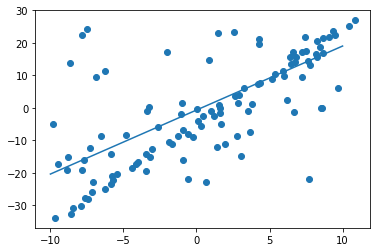

In [54]:
plt.scatter(X, Y)
plt.plot([-10, 10], [(-10)*best_slope + best_height, 10*best_slope + best_height], color='orange')